## Mall Costumers Clustering

### Import Required Libraries

In [54]:
## Data manipulation and analysis
import pandas as pd
import numpy as np

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder


### Load and Explore Dataset

In [55]:
db = pd.read_csv("Mall_Customers.csv")

print(" -------- Head -------- ")
print(db.head())

 -------- Head -------- 
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [56]:
print(" -------- Info -------- ")
print(db.info())

 -------- Info -------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [57]:
print(" -------- Describe -------- ")
print(db.describe()) ## Statistics for int columns

 -------- Describe -------- 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [58]:
print(" -------- Null values Column -------- ")
print(db.isnull().sum())

 -------- Null values Column -------- 
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [59]:
print(" -------- Unique Values Column -------- ")
print(db.nunique())

 -------- Unique Values Column -------- 
CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [60]:
print(" -------- Duplicate Rows -------- ")
print(db.duplicated().sum())

 -------- Duplicate Rows -------- 
0


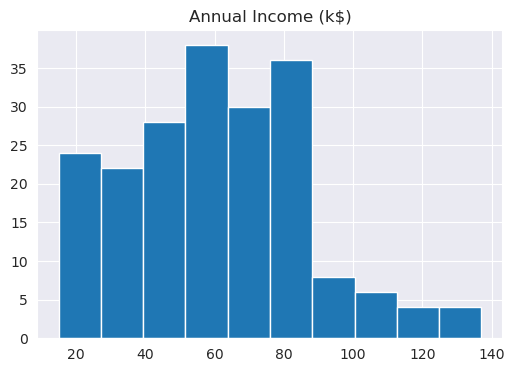

In [61]:
plt.figure(figsize=(6,4))
db['Annual Income (k$)'].hist(bins=10)
plt.title('Annual Income (k$)')
plt.show()

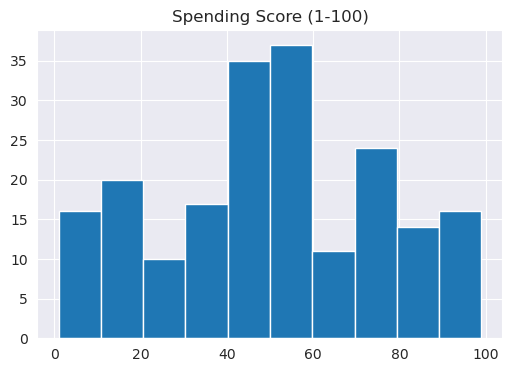

In [62]:
plt.figure(figsize=(6,4))
db['Spending Score (1-100)'].hist(bins=10)
plt.title('Spending Score (1-100)')
plt.show()

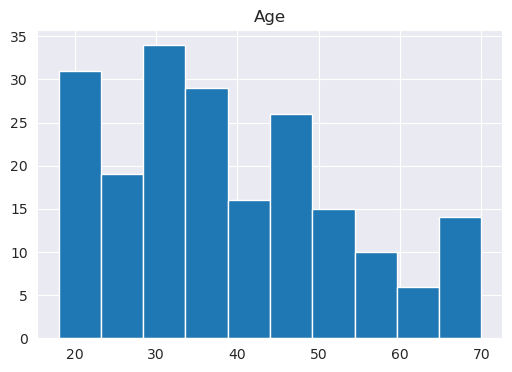

In [63]:
plt.figure(figsize=(6,4))
db['Age'].hist(bins=10)
plt.title('Age')
plt.show()

<AxesSubplot: xlabel='Genre', ylabel='count'>

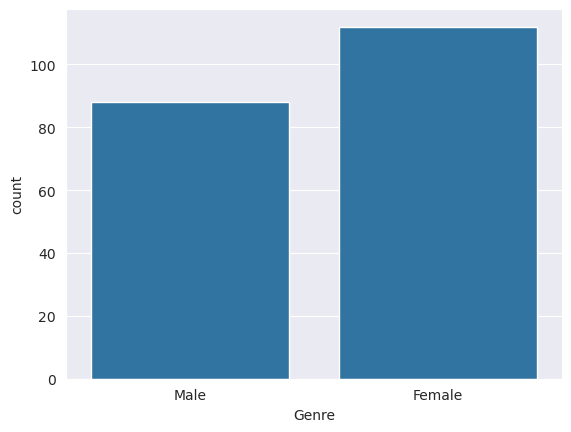

In [64]:
sns.countplot(x='Genre', data=db)

### Data Preprocessing

In [65]:
## Drop CostumerID
db.drop('CustomerID',axis=1,inplace=True)
print(db.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [66]:
## Encode Categorical Values
label_encoder = LabelEncoder()
db['Genre'] = label_encoder.fit_transform(db['Genre']) ## 0 - F 1 - M
print(db.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      1   19                  15                      39
1      1   21                  15                      81
2      0   20                  16                       6
3      0   23                  16                      77
4      0   31                  17                      40


### Exploratory Data Analysis (EDA)

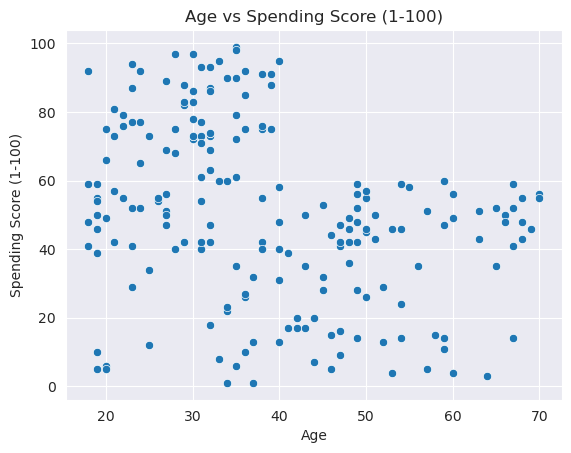

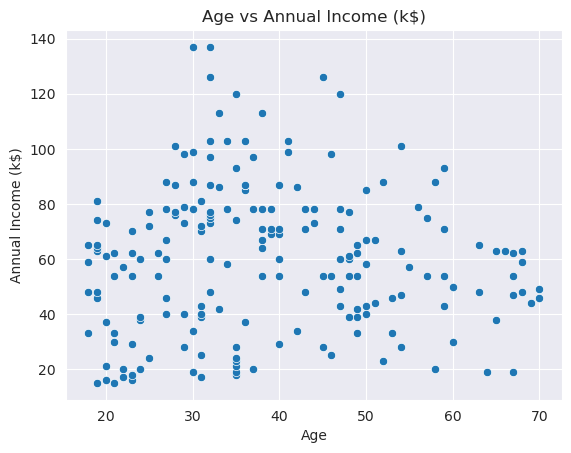

In [81]:
sns.scatterplot(data=db, x='Age', y='Spending Score (1-100)')
plt.title('Age vs Spending Score (1-100)')
plt.show()

sns.scatterplot(data=db, x='Age', y='Annual Income (k$)')
plt.title('Age vs Annual Income (k$)')
plt.show()

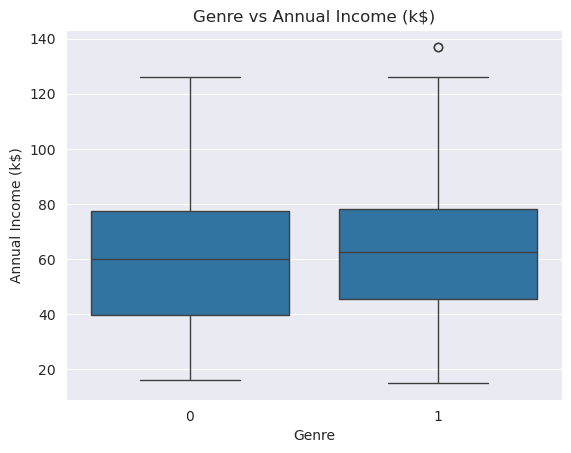

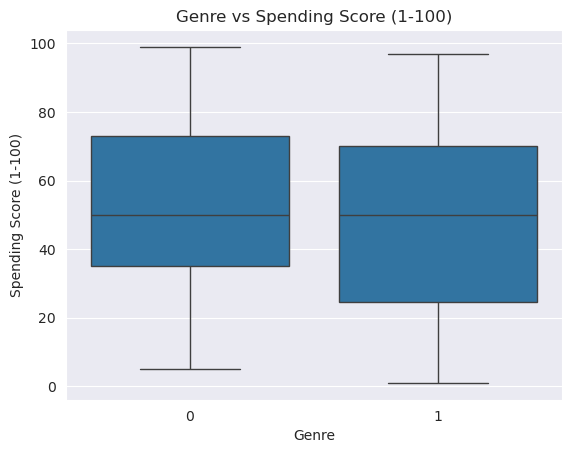

In [80]:
sns.boxplot(x='Genre', y='Annual Income (k$)', data=db)
plt.title('Genre vs Annual Income (k$)')
plt.show()
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=db)
plt.title('Genre vs Spending Score (1-100)')
plt.show()


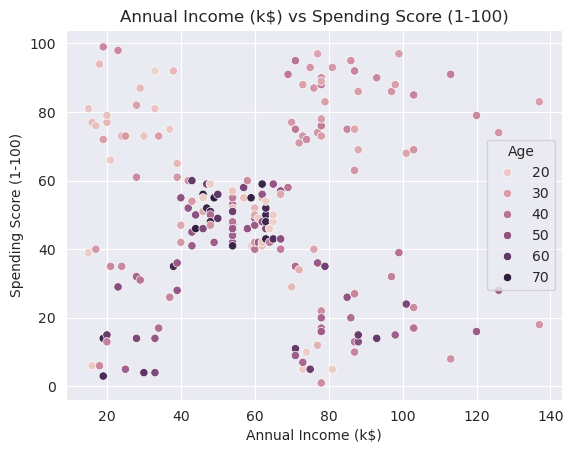

In [74]:
sns.scatterplot(data=db, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Age')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

### Data Preparation For Clusterin